In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Startpkg_A2")

Mounted at /content/gdrive


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from utils.data_process import get_CIFAR10_data
from models.neural_net import NeuralNetwork
from kaggle_submission import output_submission_csv

######### If not using Colab, you may skip these setup #########
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
####################### End of setup ###########################

# Loading CIFAR-10
Now that you have implemented a neural network that passes gradient checks and works on toy data, you will test your network on the CIFAR-10 dataset.

In [5]:
# You can change these numbers for experimentation
# For submission be sure they are set to the default values 
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 5000  # Default is 5000, do not modify this for your submission. 

data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

You can try different numbers of layers and also the different activation functions that you implemented on the CIFAR-10 dataset below.

In [6]:
input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 120
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
learning_rate = 0.05
learning_rate_decay = 0.95
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
            reg=0.00, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.360263
iteration 100 / 1000: loss 2.171381
iteration 200 / 1000: loss 2.022783
iteration 300 / 1000: loss 2.017632
iteration 400 / 1000: loss 1.983689
iteration 500 / 1000: loss 1.900510
iteration 600 / 1000: loss 1.885977
iteration 700 / 1000: loss 1.860290
iteration 800 / 1000: loss 1.836469
iteration 900 / 1000: loss 1.893836
Validation accuracy:  0.375


# Graph loss and train/val accuracies

Examining the loss graph along with the train and val accuracy graphs should help you gain some intuition for the hyperparameters you should try in the hyperparameter tuning below. It should also help with debugging any issues you might have with your network.

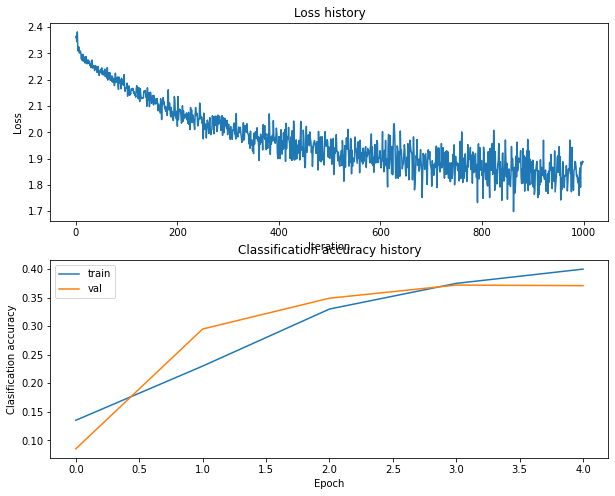

In [7]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

# Hyperparameter tuning

Once you have successfully trained a network you can tune your hyparameters to increase your accuracy.

Based on the graphs of the loss function above you should be able to develop some intuition about what hyperparameter adjustments may be necessary. A very noisy loss implies that the learning rate might be too high, while a linearly decreasing loss would suggest that the learning rate may be too low. A large gap between training and validation accuracy would suggest overfitting due to large model without much regularization. No gap between training and validation accuracy would indicate low model capacity (low model complexity). 


You will compare networks of two and three layers using the different activation functions you implemented. 

The different hyperparameters you can experiment with are:
- **Batch size**: We recommend you leave this at 200 initially which is the batch size we used. 
- **Number of iterations**: You can gain an intuition for how many iterations to run by checking when the validation accuracy plateaus in your train/val accuracy graph.
- **Initialization** Weight initialization is very important for neural networks. We used the initialization `W = np.random.randn(n) / sqrt(n)` where `n` is the input dimension for layer corresponding to `W`. We recommend you stick with the given initializations, but you may explore modifying these. Typical initialization practices: http://cs231n.github.io/neural-networks-2/#init
- **Learning rate**: Generally from around 1e-4 to 1e-1 is a good range to explore according to our implementation.
- **Learning rate decay**: We recommend a 0.95 decay to start.
- **Hidden layer size**: You should explore up to around 120 units per layer. For three-layer network, we fixed the two hidden layers to be the same size when obtaining the target numbers. However, you may experiment with having different size hidden layers.
- **Regularization coefficient**: We recommend trying values in the range 0 to 0.1. 



Hints:
- After getting a sense of the parameters by trying a few values yourself, you will likely want to write a few for loops to traverse over a set of hyperparameters.
- If you find that your train loss is decreasing, but your train and val accuracy start to decrease rather than increase, your model likely started minimizing the regularization term. To prevent this you will need to decrease the regularization coefficient. 


## DEFINING MATRIX OF PARAMETERS (ADDED BY OR)

In [8]:
#################################################################################
#                     DEFINING THE MATRIX OF PARAMETERS                         #
#        THIS MATRIX WILL BE USED FOR OPTIMIZATION OF ALL THE MODELS            #
#################################################################################

learning_rate_values = [0.1, 0.05, 0.03]
hidden_size_values = [20, 50, 80, 100, 120]
batch_size_values = [50, 100, 200]

#All of this is to build the parameter matrix

#Initializing the parameters matrix

parameters_matrix = np.zeros((len(learning_rate_values)*len(hidden_size_values)*len(batch_size_values),3))

#Entering the learning rate values

parameters_matrix[0:len(hidden_size_values)*len(batch_size_values)][:,0] = learning_rate_values[0]
parameters_matrix[len(hidden_size_values)*len(batch_size_values):2*len(hidden_size_values)*len(batch_size_values)][:,0] = learning_rate_values[1]
parameters_matrix[2*len(hidden_size_values)*len(batch_size_values):3*len(hidden_size_values)*len(batch_size_values)][:,0] = learning_rate_values[2]

#Entering the hidden size values

parameters_matrix[0:len(parameters_matrix):5,1] = hidden_size_values[0]
parameters_matrix[1:len(parameters_matrix):5,1] = hidden_size_values[1]
parameters_matrix[2:len(parameters_matrix):5,1] = hidden_size_values[2]
parameters_matrix[3:len(parameters_matrix):5,1] = hidden_size_values[3]
parameters_matrix[4:len(parameters_matrix):5,1] = hidden_size_values[4]

#Entering the hidden size values

parameters_matrix[0:len(parameters_matrix):3,2] = batch_size_values[0]
parameters_matrix[1:len(parameters_matrix):3,2] = batch_size_values[1]
parameters_matrix[2:len(parameters_matrix):3,2] = batch_size_values[2]

## Two-layer Relu Activation Network 

In [9]:
best_2layer_relu = None # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_relu.                                                    #
#################################################################################

#Initialize "best" validation accuracy

best_val_acc = 0

#Initialize vector to store all validation accuracies

val_acc_vec = np.zeros(len(parameters_matrix))

#Cycle through the matrix of parameters

for i in range(len(parameters_matrix)):

  input_size = 32 * 32 * 3
  num_layers = 2
  hidden_size = int(parameters_matrix[i,1])
  hidden_sizes = [hidden_size]*(num_layers-1)
  num_classes = 10
  learning_rate = parameters_matrix[i,0]
  learning_rate_decay = 0.95
  batch_size = int(parameters_matrix[i,2])
  net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

  # Train the network
  stats = net.train(X_train, y_train, X_val, y_val,
              num_iters=1000, batch_size=batch_size,
              learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
              reg=0.0, verbose=True)
  
  # Predict on the validation set
  val_acc = (net.predict(X_val) == y_val).mean()

  print('For parameters: ', parameters_matrix[i])
  print('Validation accuracy: ', val_acc)

  #Store the validaction accuracies

  val_acc_vec[i] = val_acc

  #Save the best model and stats

  if val_acc > best_val_acc:

    best_val_acc = val_acc
    best_2layer_relu = net
    best_stats = stats

#Print the best combination of trial parameters:

ind = np.argmax(val_acc_vec)

print('The best combination of parameters is: learning rate = ',parameters_matrix[ind,0], ', hidden layer size = ',int(parameters_matrix[ind,1]), ', batch size = ',int(parameters_matrix[ind,2]))
print('For this combination, the validation accuracy is ', val_acc_vec[ind])

iteration 0 / 1000: loss 2.715286
iteration 100 / 1000: loss 1.866864
iteration 200 / 1000: loss 1.913203
iteration 300 / 1000: loss 1.814135
iteration 400 / 1000: loss 1.981856
iteration 500 / 1000: loss 1.978752
iteration 600 / 1000: loss 1.811956
iteration 700 / 1000: loss 1.678494
iteration 800 / 1000: loss 1.764641
iteration 900 / 1000: loss 1.839433
For parameters:  [ 0.1 20.  50. ]
Validation accuracy:  0.398
iteration 0 / 1000: loss 2.542021
iteration 100 / 1000: loss 1.683022
iteration 200 / 1000: loss 1.664625
iteration 300 / 1000: loss 1.557218
iteration 400 / 1000: loss 1.844410
iteration 500 / 1000: loss 1.750250
iteration 600 / 1000: loss 1.544880
iteration 700 / 1000: loss 1.627553
iteration 800 / 1000: loss 1.524133
iteration 900 / 1000: loss 1.440771
For parameters:  [  0.1  50.  100. ]
Validation accuracy:  0.473
iteration 0 / 1000: loss 2.428241
iteration 100 / 1000: loss 1.796744
iteration 200 / 1000: loss 1.546376
iteration 300 / 1000: loss 1.577306
iteration 400 /

## Two-layer Sigmoid Activation Network 

In [13]:
best_2layer_sigmoid = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_sigmoid.                                                 #
#################################################################################

#Initialize "best" validation accuracy

best_val_acc = 0

#Initialize vector to store all validation accuracies

val_acc_vec = np.zeros(len(parameters_matrix))

#Cycle through the matrix of parameters

for i in range(len(parameters_matrix)):

  input_size = 32 * 32 * 3
  num_layers = 2
  hidden_size = int(parameters_matrix[i,1])
  hidden_sizes = [hidden_size]*(num_layers-1)
  num_classes = 10
  learning_rate = parameters_matrix[i,0]
  learning_rate_decay = 0.95
  batch_size = int(parameters_matrix[i,2])
  net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')

  # Train the network
  stats = net.train(X_train, y_train, X_val, y_val,
              num_iters=1000, batch_size=batch_size,
              learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
              reg=0.0, verbose=True)
  
  # Predict on the validation set
  val_acc = (net.predict(X_val) == y_val).mean()

  print('For parameters: ', parameters_matrix[i])
  print('Validation accuracy: ', val_acc)

  #Store the validaction accuracies

  val_acc_vec[i] = val_acc

  #Save the best model and stats

  if val_acc > best_val_acc:

    best_val_acc = val_acc
    best_2layer_sigmoid = net
    best_stats = stats

#Print the best combination of trial parameters:

ind = np.argmax(val_acc_vec)

print('The best combination of parameters is: learning rate = ',parameters_matrix[ind,0], ', hidden layer size = ',int(parameters_matrix[ind,1]), ', batch size = ',int(parameters_matrix[ind,2]))
print('For this combination, the validation accuracy is ', val_acc_vec[ind])


iteration 0 / 1000: loss 2.394454
iteration 100 / 1000: loss 1.964292
iteration 200 / 1000: loss 1.812530
iteration 300 / 1000: loss 1.871928
iteration 400 / 1000: loss 1.753414
iteration 500 / 1000: loss 2.034388
iteration 600 / 1000: loss 1.926047
iteration 700 / 1000: loss 1.773440
iteration 800 / 1000: loss 1.973519
iteration 900 / 1000: loss 1.611529
For parameters:  [ 0.1 20.  50. ]
Validation accuracy:  0.401
iteration 0 / 1000: loss 2.349226
iteration 100 / 1000: loss 1.873230
iteration 200 / 1000: loss 1.881829
iteration 300 / 1000: loss 1.686167
iteration 400 / 1000: loss 1.657714
iteration 500 / 1000: loss 1.769798
iteration 600 / 1000: loss 1.679894
iteration 700 / 1000: loss 1.534242
iteration 800 / 1000: loss 1.637482
iteration 900 / 1000: loss 1.567340
For parameters:  [  0.1  50.  100. ]
Validation accuracy:  0.42
iteration 0 / 1000: loss 2.570874
iteration 100 / 1000: loss 1.810058
iteration 200 / 1000: loss 1.679592
iteration 300 / 1000: loss 1.707853
iteration 400 / 

## Three-layer Relu Activation Network 

In [16]:
best_3layer_relu = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_relu.                                                    #
#################################################################################

#Initialize "best" validation accuracy

best_val_acc = 0

#Initialize vector to store all validation accuracies

val_acc_vec = np.zeros(len(parameters_matrix))

#Cycle through the matrix of parameters

for i in range(len(parameters_matrix)):

  input_size = 32 * 32 * 3
  num_layers = 3
  hidden_size = int(parameters_matrix[i,1])
  hidden_sizes = [hidden_size]*(num_layers-1)
  num_classes = 10
  learning_rate = parameters_matrix[i,0]
  learning_rate_decay = 0.95
  batch_size = int(parameters_matrix[i,2])
  net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

  # Train the network
  stats = net.train(X_train, y_train, X_val, y_val,
              num_iters=1000, batch_size=batch_size,
              learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
              reg=0.0, verbose=True)
  
  # Predict on the validation set
  val_acc = (net.predict(X_val) == y_val).mean()

  print('For parameters: ', parameters_matrix[i])
  print('Validation accuracy: ', val_acc)

  #Store the validaction accuracies

  val_acc_vec[i] = val_acc

  #Save the best model and stats

  if val_acc > best_val_acc:

    best_val_acc = val_acc
    best_3layer_relu = net
    best_stats = stats

#Print the best combination of trial parameters:

ind = np.argmax(val_acc_vec)

print('The best combination of parameters is: learning rate = ',parameters_matrix[ind,0], ', hidden layer size = ',int(parameters_matrix[ind,1]), ', batch size = ',int(parameters_matrix[ind,2]))
print('For this combination, the validation accuracy is ', val_acc_vec[ind])

iteration 0 / 1000: loss 2.488548
iteration 100 / 1000: loss 2.149827
iteration 200 / 1000: loss 1.861412
iteration 300 / 1000: loss 1.573523
iteration 400 / 1000: loss 1.660306
iteration 500 / 1000: loss 1.895783
iteration 600 / 1000: loss 1.484960
iteration 700 / 1000: loss 1.507817
iteration 800 / 1000: loss 1.812805
iteration 900 / 1000: loss 1.652591
For parameters:  [ 0.1 20.  50. ]
Validation accuracy:  0.398
iteration 0 / 1000: loss 2.506757
iteration 100 / 1000: loss 1.790607
iteration 200 / 1000: loss 1.535027
iteration 300 / 1000: loss 1.468571
iteration 400 / 1000: loss 1.512914
iteration 500 / 1000: loss 1.590604
iteration 600 / 1000: loss 1.384771
iteration 700 / 1000: loss 1.651912
iteration 800 / 1000: loss 1.385913
iteration 900 / 1000: loss 1.587206
For parameters:  [  0.1  50.  100. ]
Validation accuracy:  0.459
iteration 0 / 1000: loss 2.356532
iteration 100 / 1000: loss 1.686930
iteration 200 / 1000: loss 1.563930
iteration 300 / 1000: loss 1.420197
iteration 400 /

## Three-layer Sigmoid Activation Network 

In [18]:
best_3layer_sigmoid = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_sigmoid.                                                 #
#################################################################################

#Initialize "best" validation accuracy

best_val_acc = 0

#Initialize vector to store all validation accuracies

val_acc_vec = np.zeros(len(parameters_matrix))

#Cycle through the matrix of parameters

for i in range(len(parameters_matrix)):

  input_size = 32 * 32 * 3
  num_layers = 3
  hidden_size = int(parameters_matrix[i,1])
  hidden_sizes = [hidden_size]*(num_layers-1)
  num_classes = 10
  learning_rate = parameters_matrix[i,0]
  learning_rate_decay = 0.95
  batch_size = int(parameters_matrix[i,2])
  net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')

  # Train the network
  stats = net.train(X_train, y_train, X_val, y_val,
              num_iters=1000, batch_size=batch_size,
              learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
              reg=0.0, verbose=True)
  
  # Predict on the validation set
  val_acc = (net.predict(X_val) == y_val).mean()

  print('For parameters: ', parameters_matrix[i])
  print('Validation accuracy: ', val_acc)

  #Store the validaction accuracies

  val_acc_vec[i] = val_acc

  #Save the best model and stats

  if val_acc > best_val_acc:

    best_val_acc = val_acc
    best_3layer_sigmoid = net
    best_stats = stats

#Print the best combination of trial parameters:

ind = np.argmax(val_acc_vec)

print('The best combination of parameters is: learning rate = ',parameters_matrix[ind,0], ', hidden layer size = ',int(parameters_matrix[ind,1]), ', batch size = ',int(parameters_matrix[ind,2]))
print('For this combination, the validation accuracy is ', val_acc_vec[ind])

iteration 0 / 1000: loss 2.341498
iteration 100 / 1000: loss 2.207852
iteration 200 / 1000: loss 2.139997
iteration 300 / 1000: loss 2.051488
iteration 400 / 1000: loss 2.049709
iteration 500 / 1000: loss 2.104036
iteration 600 / 1000: loss 2.050512
iteration 700 / 1000: loss 1.851410
iteration 800 / 1000: loss 1.940754
iteration 900 / 1000: loss 2.018969
For parameters:  [ 0.1 20.  50. ]
Validation accuracy:  0.357
iteration 0 / 1000: loss 2.448612
iteration 100 / 1000: loss 2.077613
iteration 200 / 1000: loss 2.039883
iteration 300 / 1000: loss 2.033507
iteration 400 / 1000: loss 1.895880
iteration 500 / 1000: loss 1.932328
iteration 600 / 1000: loss 1.925898
iteration 700 / 1000: loss 1.838447
iteration 800 / 1000: loss 1.856493
iteration 900 / 1000: loss 1.591386
For parameters:  [  0.1  50.  100. ]
Validation accuracy:  0.386
iteration 0 / 1000: loss 2.364265
iteration 100 / 1000: loss 2.081808
iteration 200 / 1000: loss 2.016848
iteration 300 / 1000: loss 1.931935
iteration 400 /

# Run on the test set
When you are done experimenting, you should evaluate your final trained networks on the test set.

In [10]:
print('Two-layer relu')
test_acc = (best_2layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer relu
Test accuracy:  0.5038


In [14]:
print('Two-layer sigmoid')
test_acc = (best_2layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer sigmoid
Test accuracy:  0.4354


In [17]:
print('Three-layer relu')
test_acc = (best_3layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer relu
Test accuracy:  0.505


In [19]:
print('Three-layer sigmoid')
test_acc = (best_3layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer sigmoid
Test accuracy:  0.3964


# Kaggle output

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 2 Neural Network. Use the following code to do so:

In [12]:
output_submission_csv('nn_2layer_relu_submission.csv', best_2layer_relu.predict(X_test))

In [15]:
output_submission_csv('nn_2layer_sigmoid_submission.csv', best_2layer_sigmoid.predict(X_test))

In [17]:
output_submission_csv('nn_3layer_relu_submission.csv', best_3layer_relu.predict(X_test))

In [18]:
output_submission_csv('nn_3layer_sigmoid_submission.csv', best_3layer_sigmoid.predict(X_test))